## SQL Salary and Consumer Survey
by Wolfrank Guzman

In this SQL project we combine Python and SQL while generating fictional data using the Faker module.
We will generate information for a fictional survey which details salaries, survey questions, age and other data to then analyze and look for patterns in the data.


        Software: SQL, Python 3.11, VS Code, Jupyter Notebook
        Languages: SQL, Python
        Modules: Seaborn, Pandas, SQLite3, Matplotlib


First, lets import our modules and lets define our survey information such as names, emails etc. for a DataFrame to be constructed shortly after. 

In [1]:
import pandas as pd
import random
import faker
import seaborn as sns  
import matplotlib.pyplot as plt
import sqlite3


# Create a Faker instance to generate fake data
fake = faker.Faker()
# Define the number of rows in the DataFrame
num_rows = 200
# Initialize empty lists for each column
RecordID = [i for i in range(1, num_rows + 1)]
# List of random sexes
sexes = [random.choice(["Male", "Female"]) for _ in range(num_rows)]
# Generate random first names starting with a random letter based on sex
first_names = [fake.first_name_male() if sex == "Male" else fake.first_name_female() for sex in sexes]
last_names = [fake.last_name() for _ in range(num_rows)]
# List of email endings
email_endings = ["@gmail.com", "@yahoo.com", "@msn.com", "@comcast.net", "@fios.net", "@myspace.com", "@microsoft.net", "@lycos.net"]
# Generate random email addresses using first names
emails = [f"{first.lower()}{random.choice(email_endings)}" for first in first_names]

# Define a mapping of occupations to education levels
occupation_to_education = {
    "Software Developer": "Graduate",
    "Nurse Practitioner": "Graduate",
    "Electrician": "HS",
    "Marketing Manager": "Graduate",
    "Dental Hygienist": "Graduate",
    "Mechanical Engineer": "Graduate",
    "Social Worker": "Graduate",
    "Pharmacist": "Graduate",
    "Financial Analyst": "Graduate",
    "Physical Therapist": "Graduate",
    "Graphic Designer": "BA/BS",
    "Veterinarian": "Graduate",
    "Chef": "HS",
    "Police Officer": "HS",
    "Architect": "Graduate",
    "Occupational Therapist": "Graduate",
    "Accountant": "Graduate",
    "Civil Engineer": "Graduate",
    "Psychologist": "Graduate",
    "Plumber": "HS",
    "Web Designer": "BA/BS",
    "Pharmacy Technician": "HS",
    "Registered Nurse": "Graduate",
    "Lawyer": "Doctorate",
    "Biomedical Engineer": "Graduate",
    "Librarian": "HS",
    "Human Resources Manager": "Graduate",
    "Dental Assistant": "HS",
    "Data Analyst": "BA/BS",
    "Radiologic Technologist": "HS",
    "Construction Worker": "BA/BS",
    "Artist": "GED",
    "Environmental Scientist": "Graduate",
    "Financial Advisor": "Graduate",
    "Physical Education Teacher": "BA/BS",
    "Firefighter": "BA/BS",
    "IT Manager": "Graduate",
    "Sales Manager": "BA/BS",
    "Speech-Language Pathologist": "Graduate",
    "Marketing Coordinator": "Graduate",
    "Physician": "Doctorate",
    "Event Planner": "BA/BS",
    "Economist": "Graduate",
    "Nurse": "Graduate",
    "Aerospace Engineer": "Graduate",
    "Social Media Manager": "Graduate",
    "Investment Banker": "Graduate",
    "Professor": "Doctorate",
    "UX Designer": "Graduate",
    "Journalist": "BA/BS",
    "Biomedical Scientist": "Graduate",
    "HR Specialist": "Graduate",
    "Biotechnologist": "Graduate",
    "Physical Therapist Assistant": "Graduate",
    "Financial Planner": "Graduate",
    "Game Developer": "BA/BS",
    "Environmental Engineer": "Graduate",
    "Pediatrician": "Doctorate",
    "Marketing Analyst": "Graduate"
}

# Generate random data based on the mapping
occupations = random.choices(list(occupation_to_education.keys()), k=num_rows)
education = [occupation_to_education[occupation] for occupation in occupations]

countries_of_birth = [fake.country() for _ in range(num_rows)]
# Generate random salaries based on education levels
salaries = []
education = []

for _ in range(num_rows):
    edu_level = random.choice(['BA/BS', 'HS', 'Graduate', 'GED', 'Doctorate', 'Masters'])
    education.append(edu_level)
    
    if edu_level == 'BA/BS':
        salary = random.randint(65000, 150000)
    elif edu_level == 'HS':
        salary = random.randint(45000, 65000)
    elif edu_level == 'Graduate':
        salary = random.randint(125000, 185000)
    elif edu_level == 'GED':
        salary = random.randint(35000, 55000)
    elif edu_level == 'Doctorate':
        salary = random.randint(180000, 385000)
    elif edu_level == 'Masters':
        salary = random.randint(160000, 185000)
        
    salaries.append(salary)
age = [random.randint(22, 65) for _ in range(num_rows)]
years_of_experience = []
for a in age:
    if 22 <= a <= 30:
        years_of_experience.append(random.randint(0, 5))
    elif 30 < a <= 40:
        years_of_experience.append(random.randint(6, 10))
    elif 41 <= a <= 50:
        years_of_experience.append(random.randint(10, 18))
    else:
        years_of_experience.append(random.randint(18, 25))

avg_salary_occupation = [random.randint(30000, 220000) for _ in range(num_rows)]
sscore= [random.randint(1,10) for _ in range(num_rows)]
work_location = [random.choice(["Remote", "Hybrid","On Site"]) for _ in range (num_rows)]

# List of real U.S. state names
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
    "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Generate random states from the list of real U.S. state names
states = [random.choice(us_states) for _ in range(num_rows)]

# Create a DataFrame from the lists
df = pd.DataFrame({
    'RecordID': RecordID,
    'First Name': first_names,
    'Last Name': last_names,
    'Sex': sexes,
    'Age': age,
    'Occupation': occupations,
    'Country of Birth': countries_of_birth,
    'Education': education,
    'Salary': salaries,
    'Email': emails,
    'Years of Experience': years_of_experience,
    'Avg Salary for Occupation': avg_salary_occupation,
    'State': states, 
    'Satisfaction Score': sscore,
    'Work Location': work_location
})

# Display the first few rows of the DataFrame
display(df)


,RecordID,First Name,Last Name,Sex,Age,Occupation,Country of Birth,Education,Salary,Email,Years of Experience,Avg Salary for Occupation,State,Satisfaction Score,Work Location
0,1,Nicholas,Garcia,Male,54,Police Officer,Christmas Island,Masters,161963,nicholas@myspace.com,18,100207,Idaho,4,Remote
1,2,Angela,Singleton,Female,54,Financial Analyst,Niue,GED,47751,angela@gmail.com,25,219578,Washington,9,Hybrid
2,3,Jesus,Williams,Male,42,Lawyer,French Southern Territories,HS,47121,jesus@comcast.net,14,64606,California,1,Hybrid
3,4,Jill,Lindsey,Female,49,Data Analyst,Liechtenstein,GED,45725,jill@gmail.com,18,81101,Nebraska,7,On Site
4,5,Joshua,Hall,Male,46,Electrician,Bahamas,Graduate,146879,joshua@yahoo.com,14,174761,Utah,2,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Eric,Henderson,Male,62,Marketing Coordinator,Argentina,HS,46164,eric@lycos.net,24,208969,Kansas,8,Hybrid
196,197,Hannah,Martinez,Female,57,Event Planner,Mauritania,Masters,168618,hannah@comcast.net,21,194925,Louisiana,6,On Site
197,198,Michael,Anderson,Male,60,IT Manager,Mauritania,Masters,170274,michael@msn.com,24,148552,Florida,6,Remote
198,199,Michelle,Chan,Female,51,Civil Engineer,Cyprus,HS,58826,michelle@fios.net,20,39185,Rhode Island,10,Remote


Now that we have a DataFrame we can use this as a table to run SQLite Queries on. 
We will connect to a database, set the cursor and search for the Average Salary for our first Query on the Survey. 

In [2]:
# Create and connect to a SQLite database
conn = sqlite3.connect('data.db')
# Create a DataFrame and store it in the database
df.to_sql('data', conn, if_exists='replace')
# Create a cursor for executing SQL queries
cursor = conn.cursor()

# 3. Select the average salary for all occupations
cursor.execute("SELECT AVG(Salary) FROM data")
average_salary = cursor.fetchone()[0]
print("Average Salary:", average_salary)


Average Salary: 140061.625


Now, let's run a query for individuals with salaries above 200k. 

In [3]:
#Select the records of individuals with salaries above 200,000
cursor.execute("SELECT * FROM data WHERE Salary > 200000")
results = cursor.fetchall()
print("Records of individuals with salaries above $200,000:")
for row in results:
    print(row)


Records of individuals with salaries above $200,000:
(8, 9, 'Charles', 'Schmidt', 'Male', 34, 'Software Developer', 'Turks and Caicos Islands', 'Doctorate', 288389, 'charles@myspace.com', 8, 106294, 'Tennessee', 3, 'Hybrid')
(11, 12, 'Susan', 'Evans', 'Female', 54, 'Radiologic Technologist', 'Northern Mariana Islands', 'Doctorate', 216680, 'susan@yahoo.com', 24, 116511, 'New Mexico', 9, 'On Site')
(12, 13, 'Michael', 'Williamson', 'Male', 50, 'Environmental Engineer', 'Azerbaijan', 'Doctorate', 355162, 'michael@msn.com', 10, 32729, 'Vermont', 6, 'Remote')
(13, 14, 'Roberto', 'Matthews', 'Male', 31, 'Event Planner', 'French Guiana', 'Doctorate', 364185, 'roberto@myspace.com', 10, 104358, 'New Jersey', 4, 'On Site')
(17, 18, 'Allison', 'Watson', 'Female', 38, 'Physical Therapist Assistant', 'Guernsey', 'Doctorate', 324750, 'allison@yahoo.com', 9, 131050, 'Louisiana', 5, 'Hybrid')
(18, 19, 'Angela', 'Carter', 'Female', 22, 'Marketing Manager', 'Namibia', 'Doctorate', 370323, 'angela@myspa

From this list, pick the highest earner.

In [4]:
# Select the records of individuals with salaries above 200,000
cursor.execute("SELECT * FROM data WHERE Salary > 200000")
results = cursor.fetchall()

if results:
    # Sort the results by Salary in descending order
    results.sort(key=lambda x: x[2], reverse=True)  # Assuming Salary is in the third column (index 2)
    
    # Print the highest earner
    highest_earner = results[0]
    print("Highest earner:")
    print(highest_earner)
else:
    print("No individuals found with salaries above $200,000")


Highest earner:
(97, 98, 'Tony', 'Brown', 'Male', 47, 'Speech-Language Pathologist', 'Guam', 'Doctorate', 201793, 'tony@microsoft.net', 17, 103618, 'Oklahoma', 9, 'On Site')


We will query the youngest earner along with showing occupations and their average salaries.

In [5]:
# Select the youngest person's record
cursor.execute("SELECT * FROM data ORDER BY Age ASC LIMIT 1")
youngest_person = cursor.fetchone()
print("\n6. Youngest Person:", youngest_person)



6. Youngest Person: (18, 19, 'Angela', 'Carter', 'Female', 22, 'Marketing Manager', 'Namibia', 'Doctorate', 370323, 'angela@myspace.com', 1, 51817, 'Maine', 1, 'Hybrid')


In [6]:
# Select the occupations and their average salaries
cursor.execute("SELECT Occupation, AVG(Salary) FROM data GROUP BY Occupation")
results = cursor.fetchall()
print(" Average salary for each occupation:")
for row in results:
    print(row)
    


 Average salary for each occupation:
('Accountant', 117040.75)
('Aerospace Engineer', 176899.0)
('Architect', 275158.0)
('Artist', 124528.0)
('Biomedical Engineer', 368293.0)
('Biomedical Scientist', 181860.33333333334)
('Biotechnologist', 190417.0)
('Chef', 163182.5)
('Civil Engineer', 78998.75)
('Construction Worker', 117708.0)
('Data Analyst', 91439.5)
('Dental Assistant', 225690.0)
('Economist', 95954.75)
('Electrician', 88499.33333333333)
('Environmental Engineer', 202736.0)
('Environmental Scientist', 60454.0)
('Event Planner', 175510.75)
('Financial Advisor', 145020.5)
('Financial Analyst', 65179.0)
('Financial Planner', 180746.0)
('Firefighter', 71972.0)
('Game Developer', 108267.5)
('Graphic Designer', 62710.5)
('HR Specialist', 161303.16666666666)
('Human Resources Manager', 134597.75)
('IT Manager', 135182.33333333334)
('Investment Banker', 226353.5)
('Journalist', 121836.0)
('Lawyer', 128257.5)
('Librarian', 145408.14285714287)
('Marketing Analyst', 108275.0)
('Marketing Co

Next, we can analyze what the age of our survey responders was.  We can establish a count per age group. 

In [7]:
# Count the number of people in each age group
cursor.execute("SELECT CASE \
                 WHEN Age BETWEEN 22 AND 30 THEN '22-30' \
                 WHEN Age BETWEEN 31 AND 40 THEN '31-40' \
                 WHEN Age BETWEEN 41 AND 50 THEN '41-50' \
                 ELSE '51 and over' \
               END AS Age_Group, COUNT(*) \
               FROM data GROUP BY Age_Group")
results = cursor.fetchall()
print(" Count of people in each age group:")
for row in results:
    print(row)

 Count of people in each age group:
('22-30', 30)
('31-40', 49)
('41-50', 40)
('51 and over', 81)


Here we Query, what is the highest salary occupation?

In [8]:
# Select the highest salary and the corresponding occupation
cursor.execute("SELECT Occupation, MAX(Salary) FROM data")
result = cursor.fetchone()
print("Occupation with Highest Salary:", result)

Occupation with Highest Salary: ('Librarian', 371816)


We can visualize the average salary per occupation and then show the top ten.

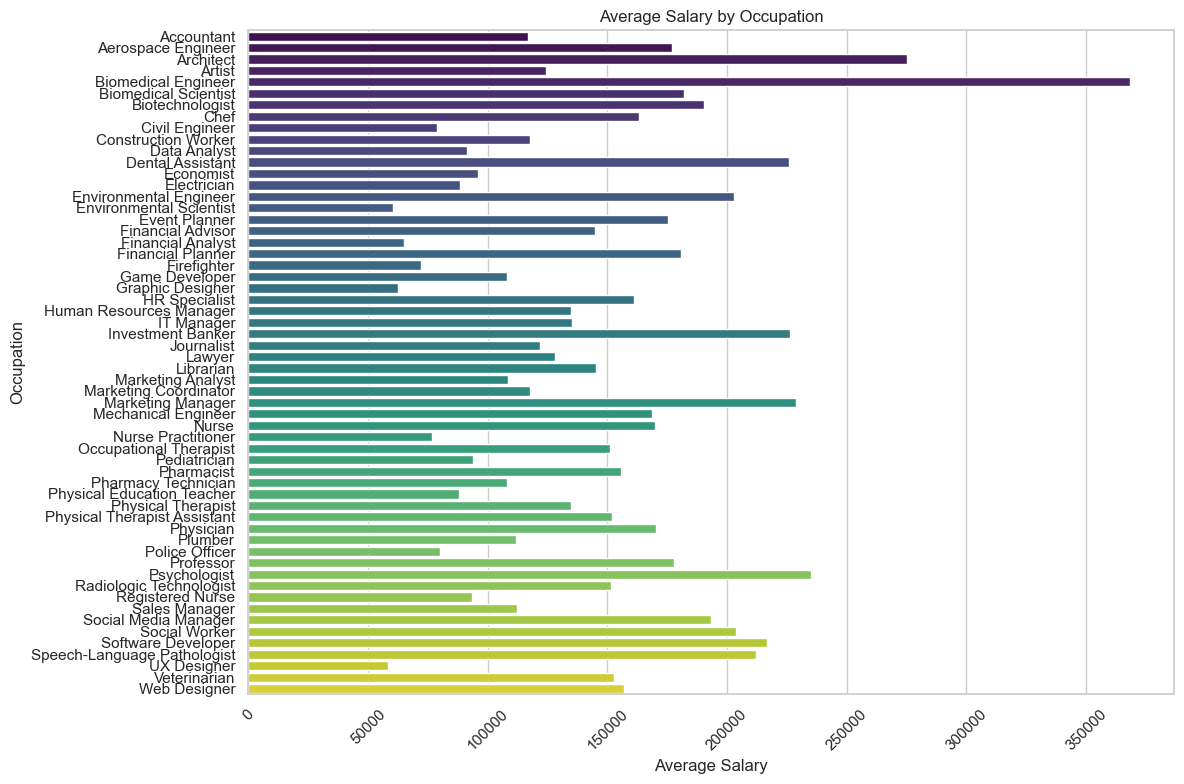

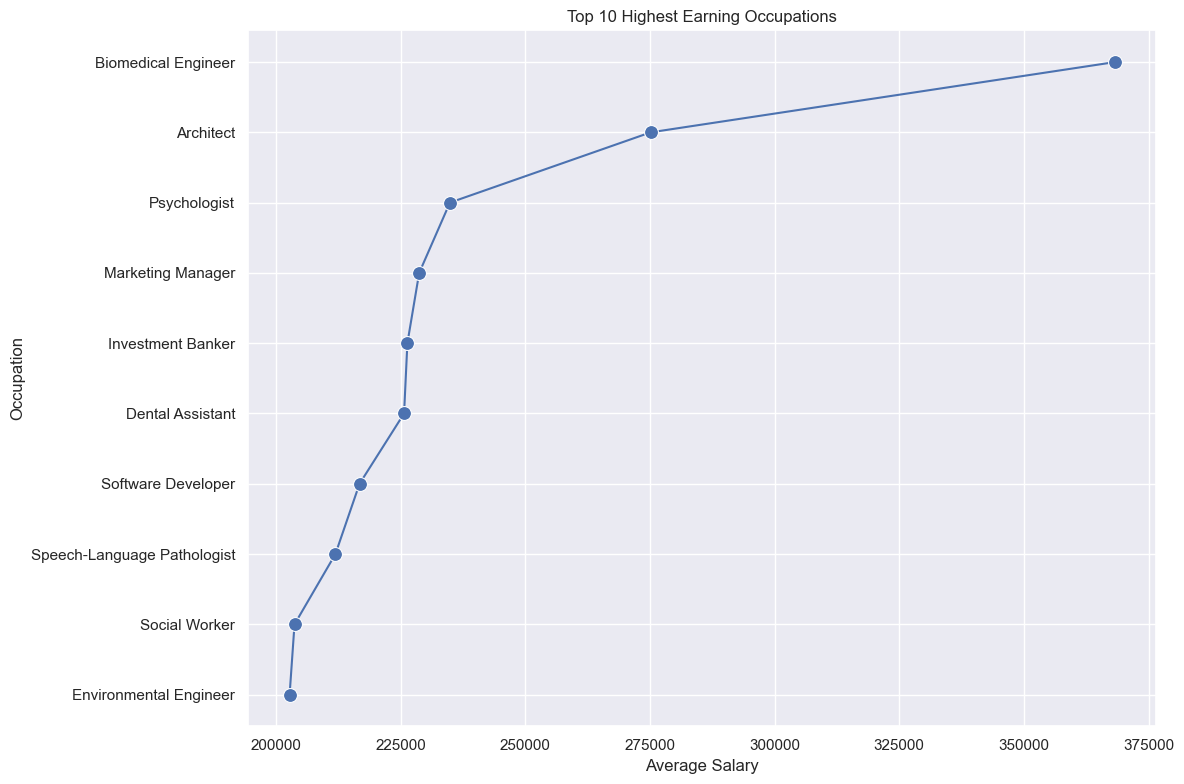

In [9]:
# Execute the SQL query to select occupations and their average salaries
cursor.execute("SELECT Occupation, AVG(Salary) FROM data GROUP BY Occupation")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Occupation', 'Average Salary'])

# Close the database connection
#conn.close()

# Create a Seaborn barplot to visualize the average salaries for each occupation
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='Average Salary', y='Occupation', data=df, palette='viridis')
plt.title('Average Salary by Occupation')
plt.xlabel('Average Salary')
plt.ylabel('Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Execute the SQL query to select the top 10 highest earning occupations
cursor.execute("SELECT Occupation, AVG(Salary) AS AvgSalary FROM data GROUP BY Occupation ORDER BY AvgSalary DESC LIMIT 10")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Occupation', 'Average Salary'])

# Create a Seaborn line chart to visualize the salaries of the top 10 highest earning occupations
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.lineplot(x='Average Salary', y='Occupation', data=df, marker='o', markersize=10, color='b')
plt.title('Top 10 Highest Earning Occupations')
plt.xlabel('Average Salary')
plt.ylabel('Occupation')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

After learning which is the highest earning salary, we can analyze the data from an Age and Education angle.  What we see in the scatter plot are any congestions of certain salary data points and identify their level of Education. 

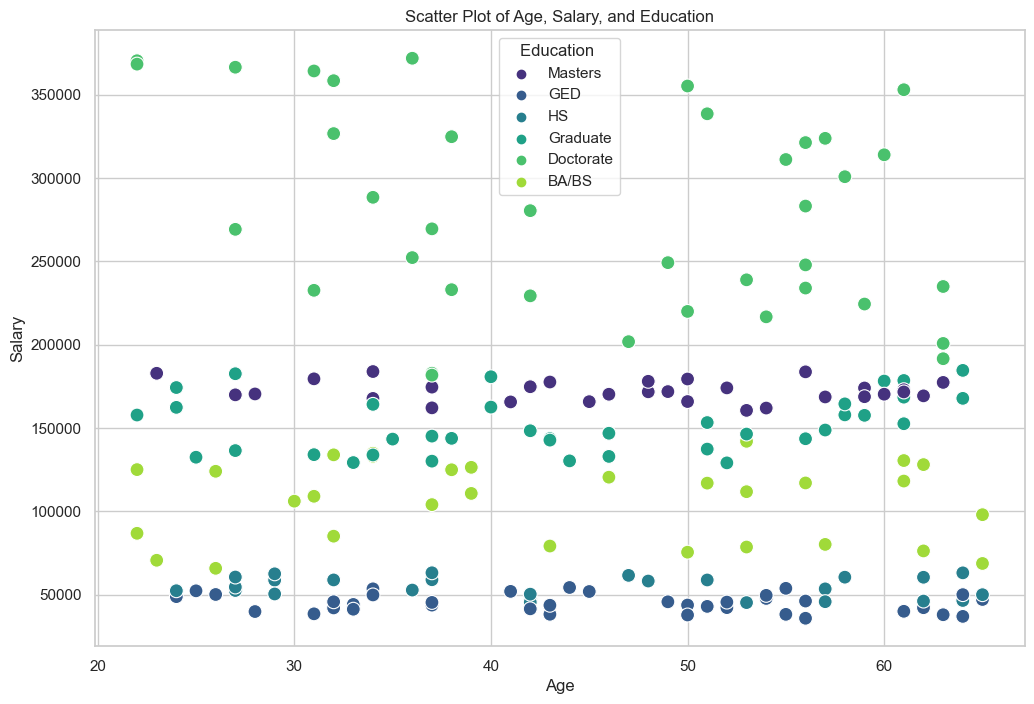

In [10]:

# Execute the SQL query to select age, salary, and sex data
cursor.execute("SELECT Age, Salary, Education FROM data")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Age', 'Salary', 'Education'])

# Close the database connection
#conn.close()

# Create a Seaborn scatter plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Specify the data and mapping of variables to plot
sns.scatterplot(x='Age', y='Salary', hue='Education', data=df, palette='viridis', s=100)

# Customize plot labels and title
plt.title('Scatter Plot of Age, Salary, and Education')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Education ')

# Show the plot
plt.show()


What is the average salary by educational level in this survey? Visualize it on a Seaborn 
bar chart. 

   Education      AvgSalary
0      BA/BS  106058.233333
1  Doctorate  279739.842105
2        GED   44885.081081
3   Graduate  151916.657895
4         HS   54548.346154
5    Masters  172536.322581


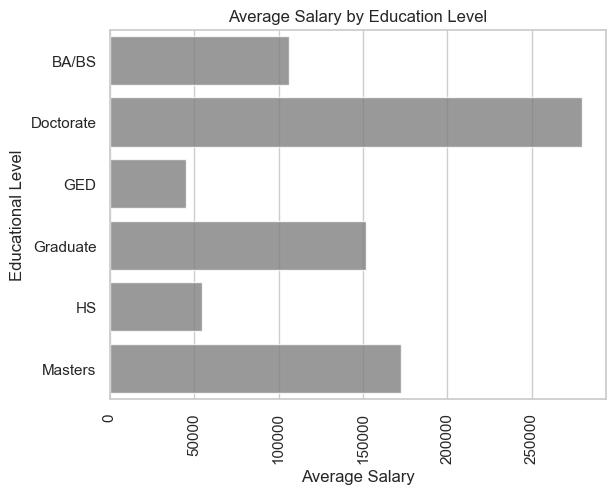

In [16]:
query2 = """
SELECT Education, AVG(Salary) AS AvgSalary
FROM data
GROUP BY Education;
"""
result2 = pd.read_sql_query(query2, conn)
print(result2)


# Calculate Average Salary by Education Level
query2 = """
SELECT Education, AVG(Salary) AS AvgSalary
FROM data
GROUP BY Education;
"""
result2 = pd.read_sql_query(query2, conn)


# Visualize average salary by education level using a bar chart
sns.barplot(x='AvgSalary', y='Education', data=result2, color='grey', alpha=0.8)
plt.title('Average Salary by Education Level')
plt.xticks(rotation=90)
plt.xlabel('Average Salary')
plt.ylabel('Educational Level')
plt.show()


What is the average satisfaction score by state? 

In [12]:
# Calculate Satisfaction Score Statistics by State
query4 = """
SELECT State, MIN("Satisfaction Score") AS MinScore,
       MAX("Satisfaction Score") AS MaxScore,
       AVG("Satisfaction Score") AS AvgScore
FROM data
GROUP BY State;
"""
result4 = pd.read_sql_query(query4, conn)

print(result4)


             State  MinScore  MaxScore  AvgScore
0          Alabama         2        10  5.333333
1           Alaska         2         8  4.000000
2          Arizona         1         9  3.666667
3         Arkansas         1        10  5.200000
4       California         1        10  5.000000
5         Colorado         5         6  5.500000
6      Connecticut         3         9  5.400000
7         Delaware         1         7  3.333333
8          Florida         6         8  7.000000
9          Georgia         1        10  6.000000
10          Hawaii         3         3  3.000000
11           Idaho         2        10  5.400000
12        Illinois         2        10  6.000000
13         Indiana         3         6  4.666667
14            Iowa         1        10  5.333333
15          Kansas         1        10  6.571429
16        Kentucky         4        10  8.000000
17       Louisiana         5         6  5.666667
18           Maine         1        10  4.500000
19        Maryland  

Within educational levels, which countries have the highest count in each level? 

In [13]:
query7= """
WITH RankedRecords AS (
    SELECT
        "Country of Birth",
        Education,
        COUNT(*) AS RecordCount,
        ROW_NUMBER() OVER(PARTITION BY Education ORDER BY COUNT(*) DESC) AS Rank
    FROM data
    GROUP BY "Country of Birth", Education
)

SELECT "Country of Birth", Education, RecordCount
FROM RankedRecords
WHERE Rank = 1;

""" 

result7 = pd.read_sql_query(query7, conn)
print(result7)

   Country of Birth  Education  RecordCount
0             Gabon      BA/BS            2
1     French Guiana  Doctorate            2
2     Faroe Islands        GED            3
3          Portugal   Graduate            2
4        Costa Rica         HS            2
5  Christmas Island    Masters            2


## Findings 


The analysis of the fictional survey dataset yielded several key findings. First, the average salary in the survey is $140,061.62, suggesting that the respondents represent a relatively high-income segment of the population. Second, the highest earner in the survey is Tony Brown, a 47-year-old male speech pathologist from Guam. This finding highlights the potential for high earnings in the field of speech pathology, particularly for those with experience and advanced degrees. Third, the highest count of respondents falls within the 51 and over age group, indicating that older workers are well-represented in the survey. This finding may reflect the fact that older workers tend to have more experience and higher education levels, which are correlated with higher earnings. Fourth, the scatter plot on Seaborn shows that there is a positive correlation between education level and salary. This finding is consistent with previous research and suggests that individuals who pursue higher education can expect to earn higher salaries. Fifth, Oklahoma had the highest satisfaction scores in the survey, suggesting that it is a desirable place to live and work. This finding may be due to a number of factors, such as the state's relatively low cost of living, its strong economy, and its high quality of life.

## Conclusion

Overall, the analysis of the fictional survey dataset provides valuable insights into the relationship between education, salary, and job satisfaction. The findings suggest that individuals who are interested in maximizing their earning potential should consider pursuing higher education. Additionally, employers should invest in training and development programs for their employees, as this can lead to increased job satisfaction and productivity. Finally, state and local governments should create policies that attract and retain high-skilled workers, as this can lead to economic growth and prosperity.